In [77]:
!pip3 install torch torchvision torchaudio

In [40]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [78]:
!pip install -r yolov5/requirements.txt

In [79]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [80]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\g.monego/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-8-26 Python-3.10.6 torch-1.12.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [83]:
img = 'https://quatrorodas.abril.com.br/wp-content/uploads/2021/04/Tr%C3%A3nsito.jpg?quality=70&strip=info'

In [84]:
results = model(img)
results.print()

image 1/1: 682x1024 11 persons, 21 cars, 7 motorcycles, 1 truck
Speed: 920.9ms pre-process, 256.7ms inference, 0.0ms NMS per image at shape (1, 3, 448, 640)


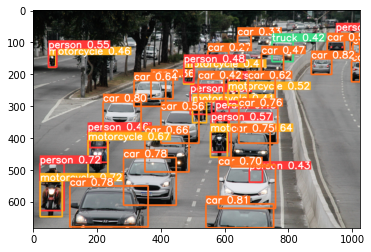

In [85]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [47]:
#cap = cv2.VideoCapture(0)
#while cap.isOpened():
#    ret, frame = cap.read()
    
    # Make detections 
#    results = model(frame)
    
#    cv2.imshow('YOLO', np.squeeze(results.render()))
    
#    if cv2.waitKey(10) & 0xFF == ord('q'):
#        break
#cap.release()
#cv2.destroyAllWindows()

In [86]:
import uuid   # Unique identifier
import os
import time

In [49]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['Giovani', 'Pamela','Fininho','Winder', 'Jarbas']
number_imgs = 5

In [50]:
!git clone https://github.com/tzutalin/labelImg


fatal: destination path 'labelImg' already exists and is not an empty directory.


In [87]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

'pyrcc5' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [97]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

^C


In [104]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\g.monego/.cache\torch\hub\master.zip
YOLOv5  2022-8-27 Python-3.10.6 torch-1.12.1+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7069459 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [92]:
img = os.path.join('data', 'images', 'IMG-20220826-WA0023.jpg')

In [93]:
results = model(img)

In [69]:
results.print()

image 1/1: 960x1280 1 Giovani, 2 Fininhos, 1 Boi
Speed: 52.4ms pre-process, 1437.8ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


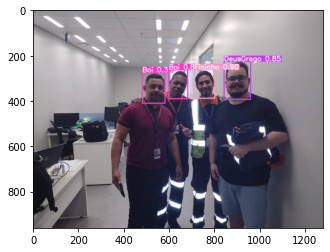

In [94]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [99]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()